## In this Notebook we will implement simple linear regression using Scikit-learn Library


### We will be working on employees salary data set to predict salary of an employee based on their years of experience.

### 1. Import required libraries

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

### 2. Load data

In [2]:
# read csv data file with pandas
df = pd.read_csv("data/Salary_data.csv")

### 3. Exploratory Data Analysis (EDA)

In [3]:
# Let's check few initial rows of the data
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


##### As we can see, there are two columns in our dataset: 
* In the first column, We have years of experience of the employees.
* In second column, We have salaries of the employees.

In [4]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
# Check some general descriptive statistics (e.g., central tendency, dispersion etc.)
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Check for null or missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

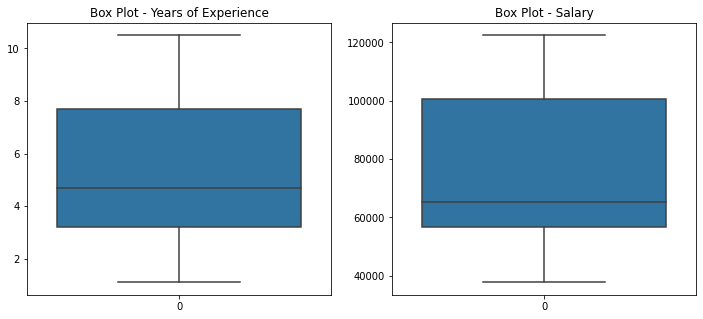

In [7]:
# Check for outliers: using box plot
fig,ax = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(ax=ax[0], data=df['YearsExperience'])
sns.boxplot(ax=ax[1], data=df['Salary'])

ax[0].set_title('Box Plot - Years of Experience')
ax[1].set_title('Box Plot - Salary')

plt.show()

#### Visualization

#### 1. Histogram 

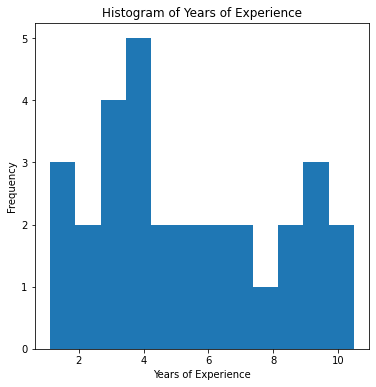

In [8]:
plt.figure(figsize=(6,6))
plt.hist(df['YearsExperience'], bins=12)
plt.title('Histogram of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

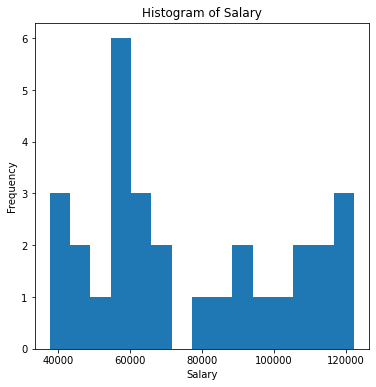

In [9]:
plt.figure(figsize=(6,6))
plt.hist(df['Salary'], bins=15)
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

#### 2. Scatter Plot

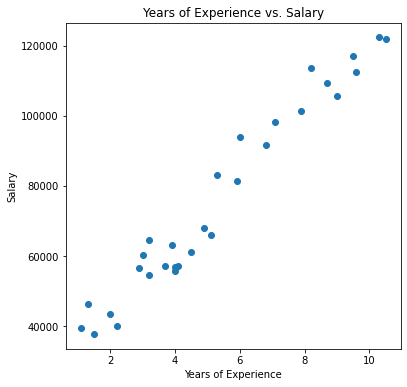

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

##### We can observe a sort of linear relationship between years of experience and salary of the employees.

 ### 4. Create train and test data

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### 5. Create Model

In [13]:
lr = LinearRegression()

### 6. Fit Model

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

### 7. Prediction on test set

In [15]:
y_pred = lr.predict(X_test)

### 8. Plot the fitted line

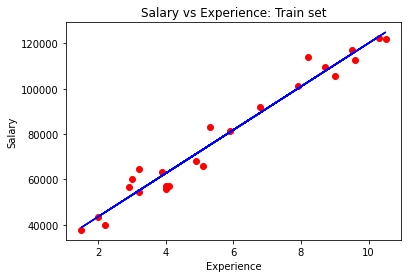

In [16]:
# Training data
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,lr.predict(X_train),color="blue")
plt.title("Salary vs Experience: Train set")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

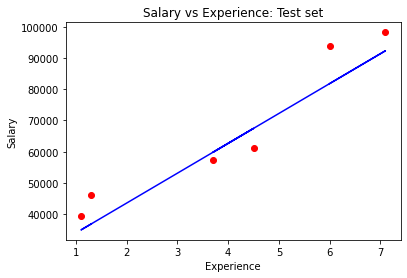

In [17]:
# Test data
plt.scatter(X_test,y_test,color="red")
plt.plot(X_test,y_pred,color="blue")
plt.title("Salary vs Experience: Test set")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [18]:
# Check the regression coefficient and intercept
print(f'Regression coefficient: {lr.coef_} \nIntercept: {lr.intercept_}')

Regression coefficient: [9569.58688543] 
Intercept: 24393.16915194835


### 9. Model Evaluation

In [19]:
# On training data
y_pred_train = lr.predict(X_train)

print('Mean absolute error (MAE):', mean_absolute_error(y_train, y_pred_train))
print('Mean squared error (MSE):', mean_squared_error(y_train, y_pred_train))
print('Root Mean squared error (RMSE):', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R-squared (r2):', r2_score(y_train, y_pred_train))

Mean absolute error (MAE): 4078.2596424835124
Mean squared error (MSE): 25922093.28794688
Root Mean squared error (RMSE): 5091.37440068464
R-squared (r2): 0.9654753572257188


In [20]:
# On test data
print('Mean absolute error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean squared error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean squared error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared (r2):', r2_score(y_test, y_pred))

Mean absolute error (MAE): 6802.779572073898
Mean squared error (MSE): 56137509.9978255
Root Mean squared error (RMSE): 7492.496913434499
R-squared (r2): 0.8886956733784565


### 10. Save trained model

In [21]:
from joblib import Parallel, delayed
import joblib  

In [22]:
# Save the model as a pickle in a file
joblib.dump(lr, 'trained_models\Simple_LR_sklearn.pkl')

['trained_models\\Simple_LR_sklearn.pkl']

### 11. Load the saved model

In [23]:
# Load the model from the file
model = joblib.load('trained_models\Simple_LR_sklearn.pkl')

### 12. Predict on a new data point using the saved model

In [24]:
yr_exp = 2.4
pred_salary = model.predict([[yr_exp]])
print(f'Predicted salary for the employees with {yr_exp} years of experience is: {pred_salary[0]}')

Predicted salary for the employees with 2.4 years of experience is: 47360.17767698722
